<a href="https://colab.research.google.com/github/sameepv21/ML_Algorithms_From_Scratch/blob/master/K_Nearest_Neighbours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
* KNN is a supervised machine leanring algorithm that can be used not only for classification but also for regression problems. However, in this, I have used it for a classficiation problem.
* KNN relies on observable data similarities and sophisticated distance metrics to generate accurate predictions.
* It can overfit the data if value of k is chosen to be less (eg. 1) and underfit the data if value of k is chosen to be high (eg. 2).

# Working
* For an observation that is not in the dataset, the algorithm will simply look for the K number of instances defined as similar based on the closest perimeter to that observation.
* Now, if KNN is used for regression tasks, the predictions will be based on the mean or median of the K closest observations.
* On the other hand, if it is used for classification problem, the mode of the closes observations will be taken as the output.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import math

from sklearn import datasets

In [2]:
iris = datasets.load_iris()

X_train = pd.DataFrame(data = iris.data, columns = iris.feature_names)
X_train['target'] = iris.target
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


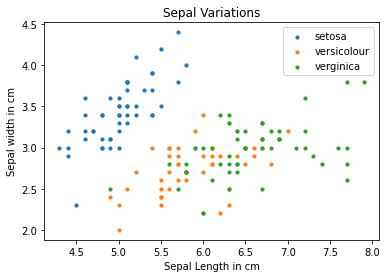

In [3]:
plt.scatter(x=X_train[X_train['target'] == 0]["sepal length (cm)"], y = X_train[X_train['target'] == 0]['sepal width (cm)'], s = 10, label = 'setosa')
plt.scatter(x=X_train[X_train['target'] == 1]["sepal length (cm)"], y = X_train[X_train['target'] == 1]['sepal width (cm)'], s = 10, label = 'versicolour')
plt.scatter(x=X_train[X_train['target'] == 2]["sepal length (cm)"], y = X_train[X_train['target'] == 2]['sepal width (cm)'], s = 10, label = 'verginica')
plt.xlabel("Sepal Length in cm")
plt.ylabel("Sepal width in cm")
plt.title("Sepal Variations")
plt.legend(loc='best')
plt.show()

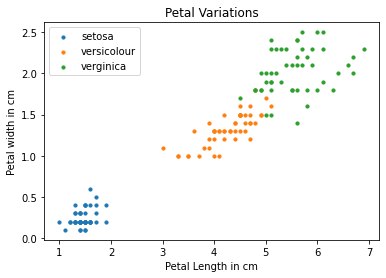

In [4]:
plt.scatter(x=X_train[X_train['target'] == 0]["petal length (cm)"], y = X_train[X_train['target'] == 0]['petal width (cm)'], s = 10, label = 'setosa')
plt.scatter(x=X_train[X_train['target'] == 1]["petal length (cm)"], y = X_train[X_train['target'] == 1]['petal width (cm)'], s = 10, label = 'versicolour')
plt.scatter(x=X_train[X_train['target'] == 2]["petal length (cm)"], y = X_train[X_train['target'] == 2]['petal width (cm)'], s = 10, label = 'verginica')
plt.xlabel("Petal Length in cm")
plt.ylabel("Petal width in cm")
plt.title("Petal Variations")
plt.legend(loc='best')
plt.show()

In [5]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [6]:
def euclidean_distance(point1, point2):
  dist = 0
  for i in range(len(point1)):
    dist += (point1[i] - point2[i]) ** 2
  
  return math.sqrt(dist)

In [7]:
def get_distances(train, test_row, k):
  distance = []
  for index in train.index:
    dist = euclidean_distance(test_row, train.iloc[index])
    distance.append((train.iloc[index], dist))
  distance.sort(key = lambda tup: tup[1])
  return distance

In [8]:
def get_neighbors(train, test_row, k):
  neighbors = []
  distance = get_distances(train, test_row, k)
  for i in range(k):
    neighbors.append(distance[i][0])
  return neighbors

In [9]:
def get_predictions(train, test_row, k):
  neighbors = get_neighbors(train, test_row, k)
  output = [row[-1] for row in neighbors] # get the target for each row in nearest neighbors
  preds = max(set(output), key = output.count)
  return preds

In [10]:
def knn_scratch(train, test, k):
  preds = []
  for row in test:
    output = get_predictions(train, row, k)
    preds.append(output)
  return preds

In [11]:
k = 10 # general value of k
test_pt = [
            [4.8, 2.7, 2.5, 0.7],
            [0.5, 3, 7, 3],
            [5, 2.2, 1, 0.9],
            [3.6, 1.8, 3.7, 1.3]
          ]

preds = knn_scratch(X_train, test_pt, k)
print(preds)

[0.0, 2.0, 0.0, 1.0]


# Important points
* Standardization is very important in knn because it is based on distance metric and distances are greatly affected by the output.
* Assumptions
  * Primary assumption is that the data points/instances which lie close to each other share similar property.
* **knn is greatly affected by curse of dimensionality because as the data gets sparser (due to higher dimensions), the distances become so comparable that it could not be differentiated between nearest and other data points.**